In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
print("Number of features before: ")
print(f"Train Data: {train_data.shape[1]}")
print(f"Test Data: {test_data.shape[1]}")

train_data["FamilySize"] = train_data['SibSp'] + train_data['Parch']
test_data["FamilySize"] = test_data['SibSp'] + test_data['Parch']

train_data = pd.get_dummies(data=train_data, prefix=['Sex'], columns=['Sex'])
test_data = pd.get_dummies(data=test_data, prefix=['Sex'], columns=['Sex'])

test_passenger_id = test_data['PassengerId']

drop_cols = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

train_data = train_data.drop(drop_cols, axis=1)
test_data = test_data.drop(drop_cols, axis=1)

print("Number of features after: ")
print(f"Train Data: {train_data.shape[1]}")
print(f"Test Data: {test_data.shape[1]}")

Number of features before: 
Train Data: 12
Test Data: 11
Number of features after: 
Train Data: 6
Test Data: 5


In [12]:
train_data.head()

,Survived,Pclass,Age,FamilySize,Sex_female,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,1,0
2,1,3,26.0,0,1,0
3,1,1,35.0,1,1,0
4,0,3,35.0,0,0,1


In [13]:
train_data.isnull().sum()

Survived        0
Pclass          0
Age           177
FamilySize      0
Sex_female      0
Sex_male        0
dtype: int64

In [14]:
train_age_median = train_data['Age'].median()

values  = {'Age' : train_age_median}
train_data = train_data.fillna(value=values)

In [15]:
train_data.isnull().sum()

Survived      0
Pclass        0
Age           0
FamilySize    0
Sex_female    0
Sex_male      0
dtype: int64

In [16]:
test_data.isnull().sum()

Pclass         0
Age           86
FamilySize     0
Sex_female     0
Sex_male       0
dtype: int64

In [17]:
test_age_median = test_data['Age'].median()

values  = {'Age' : train_age_median}
test_data = test_data.fillna(value=values)

In [18]:
test_data.isnull().sum()

Pclass        0
Age           0
FamilySize    0
Sex_female    0
Sex_male      0
dtype: int64

In [19]:
train_data.head()

,Survived,Pclass,Age,FamilySize,Sex_female,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,1,0
2,1,3,26.0,0,1,0
3,1,1,35.0,1,1,0
4,0,3,35.0,0,0,1


In [20]:
y_train = train_data['Survived']
X_train = train_data.drop(['Survived'], axis=1)

In [21]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [22]:
X_train

,Pclass,Age,FamilySize,Sex_female,Sex_male
0,3,22.0,1,0,1
1,1,38.0,1,1,0
2,3,26.0,0,1,0
3,1,35.0,1,1,0
4,3,35.0,0,0,1
...,...,...,...,...,...
886,2,27.0,0,0,1
887,1,19.0,0,1,0
888,3,28.0,3,1,0
889,1,26.0,0,0,1


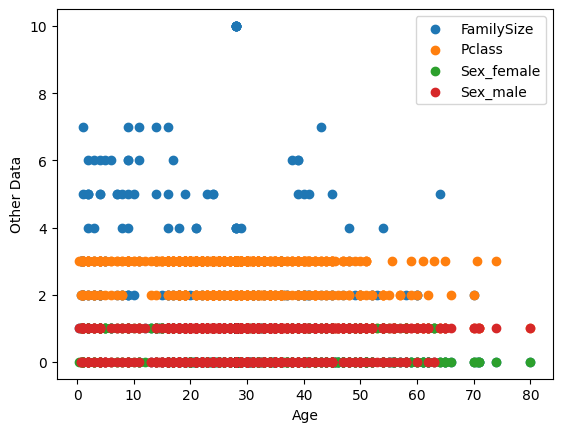

In [23]:
plt.scatter(X_train['Age'], X_train['FamilySize'])
plt.scatter(X_train['Age'], X_train['Pclass'])
plt.scatter(X_train['Age'], X_train['Sex_female'])
plt.scatter(X_train['Age'], X_train['Sex_male'])
plt.xlabel('Age')
plt.ylabel('Other Data')
plt.legend(['FamilySize', 'Pclass', 'Sex_female', 'Sex_male'])

In [24]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)
cols = X_train.columns
X_train = pd.DataFrame(X_train_scaled, columns=cols)

In [25]:
X_train.head()

,Pclass,Age,FamilySize,Sex_female,Sex_male
0,0.0,-0.461538,1.0,0.0,0.0
1,-2.0,0.769231,1.0,1.0,-1.0
2,0.0,-0.153846,0.0,1.0,-1.0
3,-2.0,0.538462,1.0,1.0,-1.0
4,0.0,0.538462,0.0,0.0,0.0


In [26]:
X_train.isnull().sum()

Pclass        0
Age           0
FamilySize    0
Sex_female    0
Sex_male      0
dtype: int64

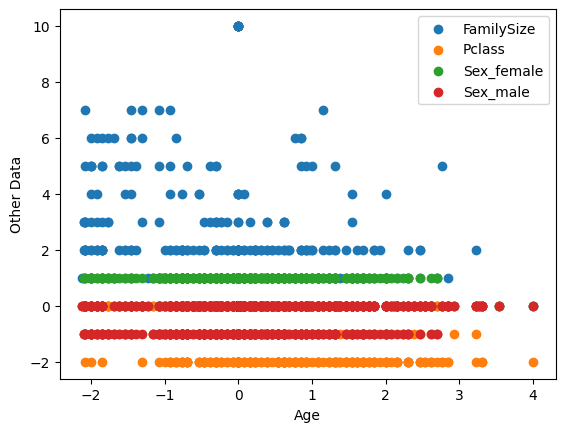

In [27]:
plt.scatter(X_train['Age'], X_train['FamilySize'])
plt.scatter(X_train['Age'], X_train['Pclass'])
plt.scatter(X_train['Age'], X_train['Sex_female'])
plt.scatter(X_train['Age'], X_train['Sex_male'])
plt.xlabel('Age')
plt.ylabel('Other Data')
plt.legend(['FamilySize', 'Pclass', 'Sex_female', 'Sex_male'])

In [28]:
test_data_scaled = robust_scaler.transform(test_data)
test_data = pd.DataFrame(test_data_scaled, columns=cols)

In [29]:
test_data.head()

,Pclass,Age,FamilySize,Sex_female,Sex_male
0,0.0,0.500000,0.0,0.0,0.0
1,0.0,1.461538,1.0,1.0,-1.0
2,-1.0,2.615385,0.0,0.0,0.0
3,0.0,-0.076923,0.0,0.0,0.0
4,0.0,-0.461538,2.0,1.0,-1.0


In [30]:
test_data.isnull().sum()

Pclass        0
Age           0
FamilySize    0
Sex_female    0
Sex_male      0
dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression

log_regr = LogisticRegression(random_state=25)

log_regr.fit(X_train, y_train)

y_pred = log_regr.predict(test_data)

In [37]:
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [38]:
values = {'PassengerId' : test_passenger_id, 'Survived' : y_pred}
output = pd.DataFrame(values)

In [62]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [41]:
output.to_csv("submission.csv", index=False)

In [43]:
from sklearn import metrics

pred_train = log_regr.predict(X_train)
cnf_matrix = metrics.confusion_matrix(y_train, pred_train)

In [47]:
cnf_matrix

array([[465,  84],
       [ 98, 244]])

In [59]:
precision = (cnf_matrix[0][0] / np.sum(cnf_matrix[0]))
recall = (cnf_matrix[0][0] / np.sum(cnf_matrix[:, 0]))
f1_score = 2 * (precision * recall)/(precision + recall)

In [61]:
print(f"Precision:\n\t{precision*100:.4f}%")
print(f"Recall:\n\t{recall*100:.4f}%")
print(f"F1 Score:\n\t{f1_score*100:.4f}%")

Precision:
	84.6995%
Recall:
	82.5933%
F1 Score:
	83.6331%
